# IBM (Coursera) Data Science Professional Certificate
## Course 9/9 - Applied Data Science Capstone
### Justin Sierchio

# Introduction
## Business Problem

One of the leading causes of death and injury across the United States are traffic accidents. In order to better understand the potential impacts (and possibly mitigate them), we will be looking at predicting the severity of a car accident based upon several attributes. To localize the scope of this study, we will be evaluating accident statistics for the municipality of Seattle, Washington.

This report will be of particular interest to drivers, city planners, emergency responders and insurance providers.

# Data 
## Understanding

This data is maintained by the Seattle Police Department and contains records of every traffic accident from 2004 to the present, updated on a weekly basis. This dataset (contained in a .csv file) contains information such as:
- the severity of the accident
- type of collision
- number of fatalities and/or injuries
- weather conditions
- road conditions
- any pedestrians or non-automobiles involved
and other factors.

The dataset can be found at: https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv and the metadata can be found at https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf.

We will be particularly interested in how weather/road conditions, attentiveness/impairment of the driver and pedestrian/non-automobile involvement plays into traffic accident severity. Are there correlations betwwen poor weather conditions and severity? Does the presence of pedestrians make an accident better or worse? How do road conditions affect accident severity? These are some of the questions we hope to be able to answer in this project.

We will be performing the following:
- an exploratory data analysis to determine which variables are needed to construct a machine learning model
- choose an appropriate model for which to conduct the study
- training the model
- testing the model, and finally 
- calculating the effectiveness of our model.

## Data Upload

In [1]:
# Import Initial Libraries
import pandas as pd
import numpy as np

In [2]:
# Initial Print Statement
print('Hello Capstone Project Course!');

Hello Capstone Project Course!


First, we need to upload the actual dataset and make sure it loads into our notebook properly.

In [3]:
# Import Dataset
df = pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv");
print('Data file successfully loaded!');

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Data file successfully loaded!


In [4]:
# Display 1st 5 rows from dataset
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


# Methodology
## Data Cleaning

Before  we conduct any meaningful exploratory data analysis, we will want to clean the data.

In [5]:
# Now that we know the dataset will load, let us look at some characteristics of the dataset itself
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

'SEVERITYCODE' is the variable that tells us the actual severity (code) of a respective accident. This variable is what we are trying to predict as accurately as possible. Since 'SEVERITYCODE' is a non-null int64 value, we can actually see what potential values it holds.

In [6]:
# Determine the counts of 'SEVERITYCODE'
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

So now we have determined that 'SEVERITYCODE' has either values of 1 or 2. As is stated in the metadata, these values corresponding to the following: 

<ul>
    <li> (1) equals Prop Damage</li> 
    <li> (2) equals Injury</li>
</ul>

Since we notice that 'SEVERITYCODE', 'SEVERITYCODE.1', and 'SEVERITYDESC' have the same meaning, we can initially simplify the data by removing the latter two columns.

In [7]:
# Remove 'SEVERITYCODE.1', 'SEVERITYDESC'
df= df.drop(['SEVERITYDESC', 'SEVERITYCODE.1'], axis=1)
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


Now, we will need to further simplify and clean the data by looking at how many NULL values each field (column) holds.

In [8]:
# Determine the number of null values for each column
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

Given our discussion at the beginning of this project that we were concerned with weather/road conditions, impairment/attentiveness of the driver and pedestrian/non-automobile involvedment, we realize that we need to do three tasks:

<ul>
  <li>change any unclear values in 'WEATHER', 'ROADCOND' and 'LIGHTCOND' to NaN (Not a Number) so they can be easily excluded later</li>
  <li>fill in missing values in columns we need, specifically in 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT' and 'SPEEDING' </li>
  <li>remove the columns not needed in our analysis</li>
</ul>

In [9]:
# Changing unclear values in 'WEATHER', 'ROADCOND' and 'LIGHTCOND'

# WEATHER -- 'Unknown', 'Other' -- NaN
df['WEATHER'].replace(to_replace=['Unknown','Other'], value=[np.nan,np.nan],inplace=True)

# ROADCOND -- 'Unknown', 'Other' -- NaN
df['ROADCOND'].replace("Unknown", np.nan, inplace = True)
df['ROADCOND'].replace("Other", np.nan, inplace = True)

# LIGHTCOND -- 'Unknown', 'Other' -- NaN
df['LIGHTCOND'].replace("Unknown", np.nan, inplace = True)
df['LIGHTCOND'].replace("Other", np.nan, inplace = True)

In [10]:
# Filling in missing values for 'INATTENTIONIND', 'UNDERINFL', 'PEDROWNOTGRNT' and 'SPEEDING'

# INATTENIONIND: 
# Change all 'Y' values to 1
# Make all non-'Y' values equal to 'N' (since the meaning is that the driver WAS attentive for a value of N or No)
# Change all 'N' values to 0
df['INATTENTIONIND'].fillna(0, inplace=True)
df['INATTENTIONIND'].replace("N", 0, inplace=True)
df['INATTENTIONIND'].replace("Y", 1, inplace = True)

# UNDERINFL:
# Change all values to quantitative values
# Change all empty cells to 'N' (since the meaning is that the driver was NOT under the influence)
# Change all 'N' values to 0
# Change all 'Y' values to 1
df['UNDERINFL'].fillna(0, inplace=True)
df['UNDERINFL'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)
df['UNDERINFL']=df['UNDERINFL'].astype(dtype='int64')

# PEDROWNOTGRNT:
# Change all empty cells to 'N' (since the meaning is that the pedestrian right-of-way WAS granted)
# Change all 'N' values to 0
# Change all 'Y' values to 1
df['PEDROWNOTGRNT'].fillna(0, inplace=True)
df['PEDROWNOTGRNT'].replace("N", 0, inplace=True)
df['PEDROWNOTGRNT'].replace("Y", 1, inplace = True)

# SPEEDING:
# Change all empty cells to 'N' (Since the meaning is that the driver was NOT speeding)
# Change all 'N' values to 0
# Change all 'Y' values to 1
df['SPEEDING'].fillna(0, inplace=True)
df['SPEEDING'].replace(to_replace='Y', value=1,inplace=True)

At this juncture, let us look at the status of our dataset.

In [11]:
# Show current status of dataset after initial cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 36 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null object
JUNCTIONTYPE      188344 non-null object
SDOT_COLCODE      194673 non-null int

So now we have data (of some kind) in each of the columns of our dataset. Let us now choose the columns we wish to use for our feature selection and to continue this analysis.

Some of the variables, like SDOT_COLCODE, appear to have information already covered in other variables. Others, like INCDATE, lie outside the scope of the study we are trying to make.

In [12]:
# Column Choice for Feature Selections
df_featureSelection = df[['SEVERITYCODE','ADDRTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INATTENTIONIND','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','PEDROWNOTGRNT','SPEEDING']]

# Number of 'NULL' values remaining among the Feature Selection subsete
df_featureSelection.isnull().sum()

SEVERITYCODE          0
ADDRTYPE           1926
PERSONCOUNT           0
PEDCOUNT              0
PEDCYLCOUNT           0
VEHCOUNT              0
INATTENTIONIND        0
UNDERINFL             0
WEATHER           21004
ROADCOND          20222
LIGHTCOND         18878
PEDROWNOTGRNT         0
SPEEDING              0
dtype: int64

Given we have dramatically reduced the 'NULL' values of our dataset, let us remove these 'NULL' values.

In [13]:
# Remove 'NULL' data from the Feature Selection subset
df_featureSelection.dropna(axis=0,inplace=True)

# Display the updated Feature Selection subset
df_featureSelection.isnull().sum()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


SEVERITYCODE      0
ADDRTYPE          0
PERSONCOUNT       0
PEDCOUNT          0
PEDCYLCOUNT       0
VEHCOUNT          0
INATTENTIONIND    0
UNDERINFL         0
WEATHER           0
ROADCOND          0
LIGHTCOND         0
PEDROWNOTGRNT     0
SPEEDING          0
dtype: int64

At this juncture, let us now look at the cleaned data for our Feature Selection subset.

In [14]:
# Display the 1st 5 rows of the Feature Selection subset
df_featureSelection.head()

,SEVERITYCODE,ADDRTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING
0,2,Intersection,2,0,0,2,0,0,Overcast,Wet,Daylight,0,0
1,1,Block,2,0,0,2,0,0,Raining,Wet,Dark - Street Lights On,0,0
2,1,Block,4,0,0,3,0,0,Overcast,Dry,Daylight,0,0
3,1,Block,3,0,0,3,0,0,Clear,Dry,Daylight,0,0
4,2,Intersection,2,0,0,2,0,0,Raining,Wet,Daylight,0,0


We notice that while we have a dataset that has a complete set of values for each column, the columns have a mix of both categorical variables (binary i.e. INATTENTIONIND, UNDERINFL) and numerical variables (integers, strings i.e. VEHCOUNT, WEATHER).

In order to do any data analysis, we will need to convert all the remaining columns into numerical variables. This task can be done using the 'get_dummies' function in the Pandas library.

In [15]:
# Change Categorical Variables into Numerical Variables

# ADDRTYPE
# Convert into 3 columns representing 'Alley', 'Block', 'Intersection'
df_featureSelection[['Alley', 'Block', 'Intersection']] = pd.get_dummies(df_featureSelection['ADDRTYPE'])
df_featureSelection.drop(['ADDRTYPE'], axis=1, inplace=True)

# WEATHER
# Convert into several columns
df_featureSelection[pd.get_dummies(df_featureSelection['WEATHER']).columns] = pd.get_dummies(df_featureSelection['WEATHER'])
df_featureSelection.drop(['WEATHER'], axis=1, inplace=True)

# ROADCOND
# Convert into several columns
df_featureSelection[pd.get_dummies(df_featureSelection['ROADCOND']).columns] = pd.get_dummies(df_featureSelection['ROADCOND'])
df_featureSelection.drop(['ROADCOND'], axis=1, inplace=True)

# LIGHTCOND
# Convert into several columns
df_featureSelection[pd.get_dummies(df_featureSelection['LIGHTCOND']).columns] = pd.get_dummies(df_featureSelection['LIGHTCOND'])
df_featureSelection.drop(['LIGHTCOND'], axis=1, inplace=True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]
/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Before conducting exploratory data analysis, let us take a look at our final updated Feature Selection subset.

In [16]:
# Display 1st 5 rows of final updated Feature Selection subset
df_featureSelection.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INATTENTIONIND,UNDERINFL,PEDROWNOTGRNT,SPEEDING,Alley,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,2,2,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,2,0,0,2,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,1,4,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,3,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2,2,0,0,2,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


So now we are ready for our data exploration!

## Data Exploration

Now that we have cleaned our data, let us do some exploratory data analysis to get an idea of any trends/inferences we might be able to obtain before developing our machine learning model.

Let us start with developing correlation matrices to see how sensitive the variables are to one another. We will start with weather and road conditions.

In [17]:
# Import Visualization Libraries
import seaborn as sns 
import matplotlib.pyplot as plt

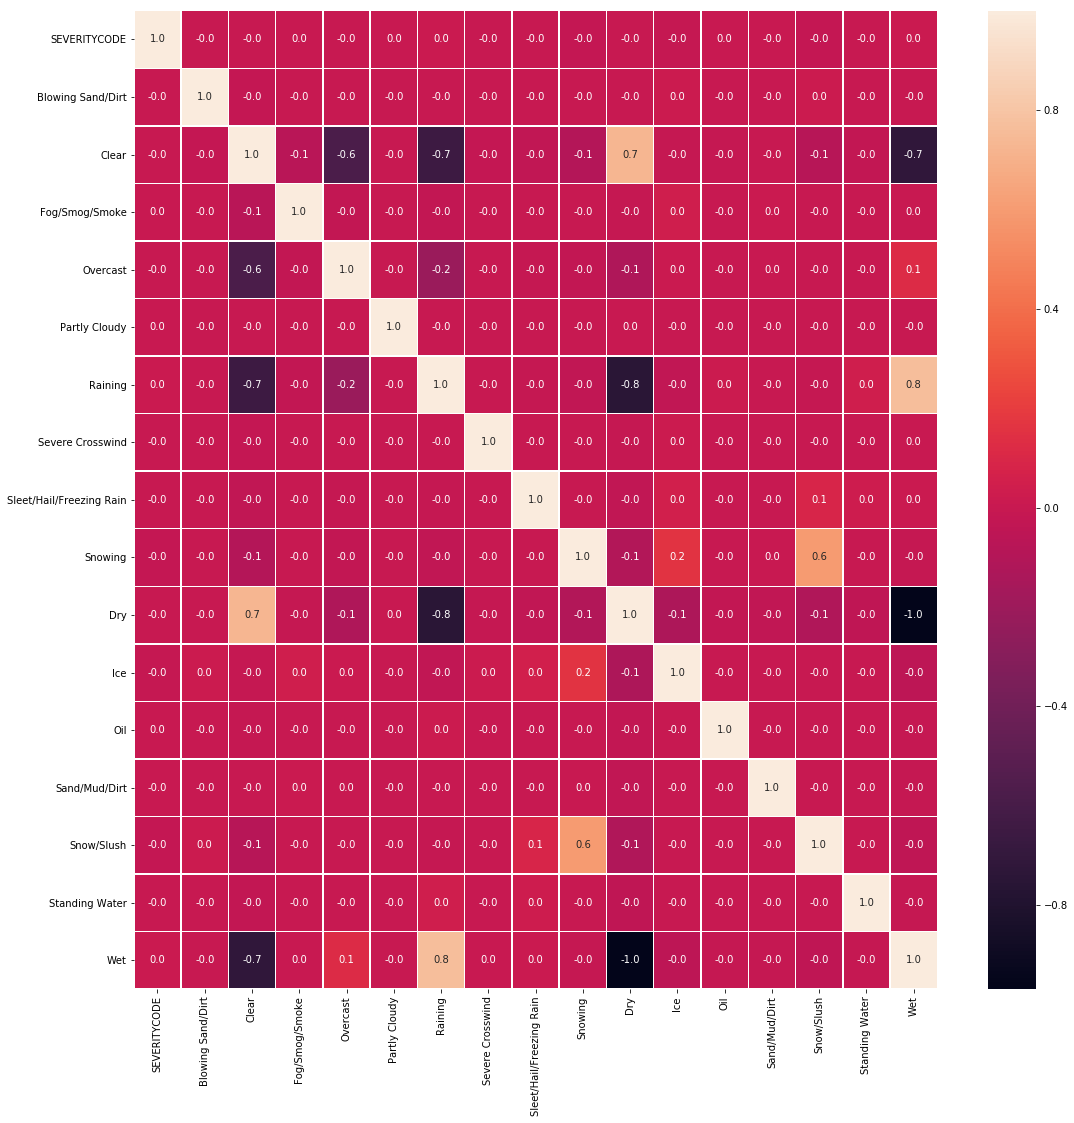

In [18]:
# Weather and Road Conditions Correlation Matrix
# Construct the Weather/Road Conditions Selection
df_featureSelection_Weather = df_featureSelection[['SEVERITYCODE', 'Blowing Sand/Dirt', 'Clear', 'Fog/Smog/Smoke', 'Overcast', 'Partly Cloudy', 'Raining', 'Severe Crosswind', 
                                          'Sleet/Hail/Freezing Rain', 'Snowing', 'Dry', 'Ice', 'Oil', 'Sand/Mud/Dirt', 'Snow/Slush', 'Standing Water', 'Wet']]

# Create the Weather/Road Conditions Correlation Matrix
figureWeather, axisWeather = plt.subplots(figsize=(18, 18));
sns.heatmap(df_featureSelection_Weather.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisWeather);

According to our heatmap, interestingly enough, there does not appear to be any correlation between a specific weather/road condition and the severity of an accident. Next, let us take a look at the lighting conditions.

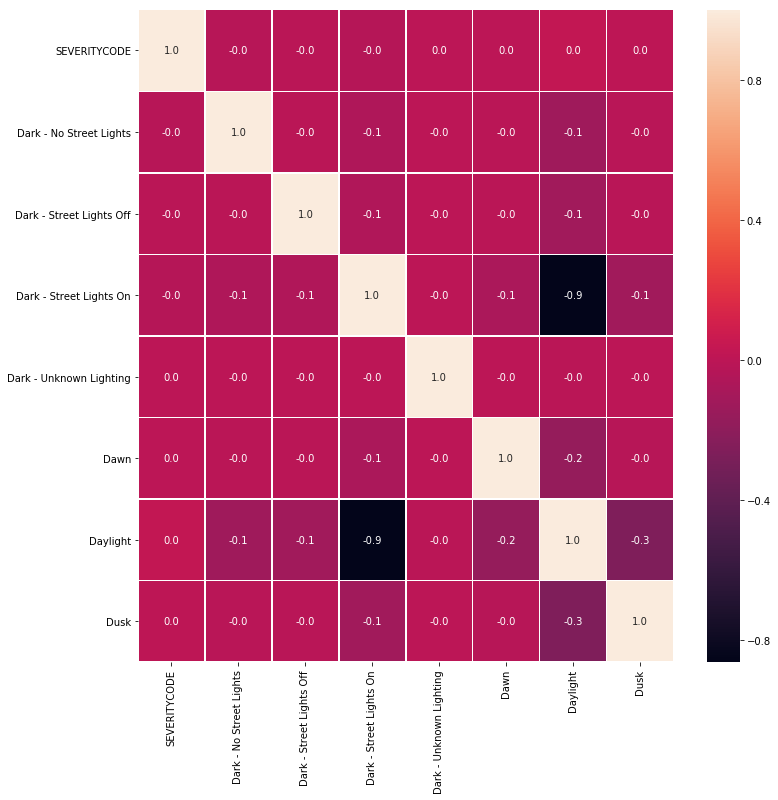

In [19]:
# Lighting Conditions Correlation Matrix
# Lighting Conditions Selection
df_featureSelection_Lighting = df_featureSelection[['SEVERITYCODE', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Dark - Street Lights On', 
                                                    'Dark - Unknown Lighting', 'Dawn', 'Daylight', 'Dusk']]

# Create the Lighting Conditions Correlation Matrix
figureLighting, axisLighting = plt.subplots(figsize=(12, 12));
sns.heatmap(df_featureSelection_Lighting.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisLighting);

According to our heatmap, interestingly enough, there does not appear to be any correlation between a specific lighting condition and the severity of an accident. To confirm this conclusion, let's plot the accidents by relative time of day. 

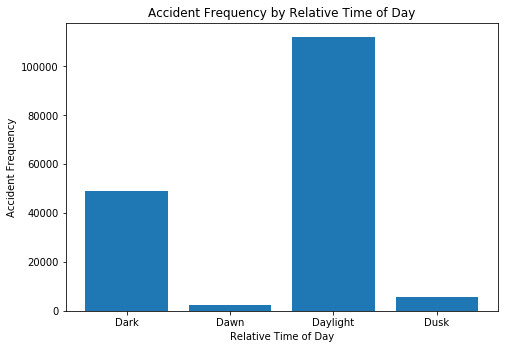

In [20]:
# Plot Accidents by the Time of Day (relative)

# Dark Streets
DarkNoStreetLight = df_featureSelection[['Dark - No Street Lights']].astype(bool).sum(axis=0);
accidents_DarkNoStreetLight = np.asscalar(np.array(DarkNoStreetLight));

DarkStreetLightsOff = df_featureSelection[['Dark - Street Lights Off']].astype(bool).sum(axis=0);
accidents_DarkStreetLightsOff = np.asscalar(np.array(DarkStreetLightsOff));

DarkStreetLightsOn = df_featureSelection[['Dark - Street Lights On']].astype(bool).sum(axis=0);
accidents_DarkStreetLightsOn = np.asscalar(np.array(DarkStreetLightsOn));

DarkUnknownLighting = df_featureSelection[['Dark - Unknown Lighting']].astype(bool).sum(axis=0);
accidents_DarkUnknownLighting = np.asscalar(np.array(DarkUnknownLighting));

accidents_Dark = accidents_DarkNoStreetLight + accidents_DarkStreetLightsOff + accidents_DarkStreetLightsOn + accidents_DarkUnknownLighting;

# Dawn Streets
Dawn = df_featureSelection[['Dawn']].astype(bool).sum(axis=0);
accidents_Dawn = np.asscalar(np.array(Dawn));

# Daylight Streets
Daylight = df_featureSelection[['Daylight']].astype(bool).sum(axis=0);
accidents_Daylight = np.asscalar(np.array(Daylight));

# Dusk Streets
Dusk = df_featureSelection[['Dusk']].astype(bool).sum(axis=0);
accidents_Dusk = np.asscalar(np.array(Dusk));

# Plot the Accidents by Time of Day (Relative)
figure = plt.figure()
axis = figure.add_axes([0,0,1,1])
accident_time_of_day = ['Dark', 'Dawn', 'Daylight', 'Dusk']
accident_time_of_day_frequency = [accidents_Dark, accidents_Dawn, accidents_Daylight, accidents_Dusk]
axis.bar(accident_time_of_day, accident_time_of_day_frequency)
plt.title('Accident Frequency by Relative Time of Day');
plt.xlabel('Relative Time of Day');
plt.ylabel('Accident Frequency');
plt.show()

The graph of accidents vs. relative time of day makes sense, since the majority of drivers are out during the day commuting to/from work. Now let us look at the attentiveness and/or impairment of the driver.

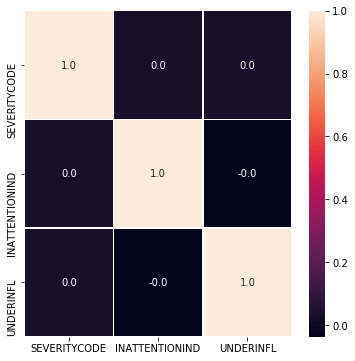

In [21]:
# Attentiveness/Impairment Correlation Matrix
# sub-Feature Selection
df_featureSelection_Driver = df_featureSelection[['SEVERITYCODE', 'INATTENTIONIND', 'UNDERINFL']]

# Create the Lighting Conditions Correlation Matrix
figureDriver, axisDriver = plt.subplots(figsize=(6, 6));
sns.heatmap(df_featureSelection_Driver.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisDriver);

According to our heatmap, the inattentiveness of the driver and whether they are under the influence is also not correlated with the severity of an accident. Let us examine three more possibilities: location, the presence of a pedestrian/non-automobile, and whether the driver was speeding/not granting the right of way.

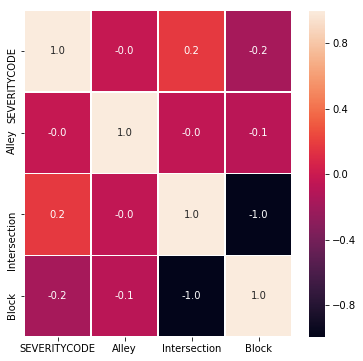

In [22]:
# Construct Accident Location Correlation Matrix

# sub-Feature Selection
df_featureSelection_Location = df_featureSelection[['SEVERITYCODE', 'Alley', 'Intersection', 'Block']]
# Create the Accident Location Correlation Matrix
figureLocation, axisLocation = plt.subplots(figsize=(6, 6));
sns.heatmap(df_featureSelection_Location.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisLocation);

The Location Matrix heatmap appears to show a slight correlation with severity of accidents in intersections as opposed to blocks or alleys. Logically, this correlation would appear to make sense, since automobiles are most likely moving and surrounded by other automobiles in an intersection. Let's confirm this by looking at the actual values of accident severity vs. location type.

In [23]:
# Creating Table of Accident Severity vs. Location Type
df_fS2 = df_featureSelection;
df_fS2.index.name = 'id';

# Alleys
SC1A = [(df_fS2['SEVERITYCODE']==1) & (df_fS2['Alley']==1)];
SC1A = np.count_nonzero(SC1A);
SC2A = [(df_fS2['SEVERITYCODE']==2) & (df_fS2['Alley']==1)];
SC2A = np.count_nonzero(SC2A);

# Intersections
SC1I = [(df_fS2['SEVERITYCODE']==1) & (df_fS2['Intersection']==1)];
SC1I = np.count_nonzero(SC1I);
SC2I = [(df_fS2['SEVERITYCODE']==2) & (df_fS2['Intersection']==1)];
SC2I = np.count_nonzero(SC2I);

# Blocks
SC1B = [(df_fS2['SEVERITYCODE']==1) & (df_fS2['Block']==1)];
SC1B = np.count_nonzero(SC1B);
SC2B = [(df_fS2['SEVERITYCODE']==2) & (df_fS2['Block']==1)];
SC2B = np.count_nonzero(SC2B);

# Percentage Difference Between Severity
percentage1over2A = (1 - (SC2A / SC1A));
percentage1over2I = (1 - (SC2I / SC1I));
percentage1over2B = (1 - (SC2B / SC1B));

SCLocation = {'Accident Location': ['Alley', 'Intersection', 'Block'], 'Severity = 1 ': [SC1A, SC1I, SC1B], 
              'Severity = 2': [SC2A, SC2I, SC2B], '% Difference btwn Sev=1, Sev=2': [percentage1over2A, percentage1over2I, percentage1over2B]};
df_SCLocation = pd.DataFrame(SCLocation);
df_SCLocation

,Accident Location,Severity = 1,Severity = 2,"% Difference btwn Sev=1, Sev=2"
0,Alley,516,77,0.850775
1,Intersection,34463,26808,0.222122
2,Block,78726,28657,0.635991


As one can see, there is only 22.2% difference between intersection severity, as opposed to an 85.1% difference for alleys and 63.6% difference for blocks, confirming our original conclusion. Let's continue to finish our correlation studies.

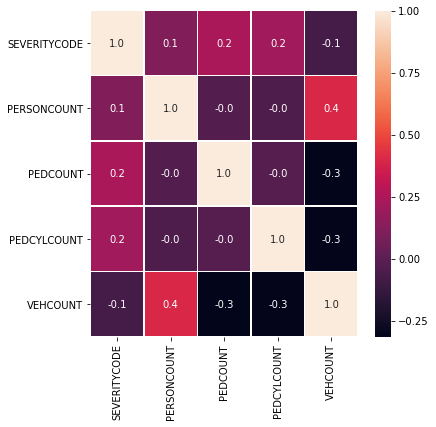

In [24]:
# Construct Pedestrian/Non-Automobile Correlation Matrix
# sub-Feature Selection
df_featureSelection_NonAuto = df_featureSelection[['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
# Create the Pedestrian/Non-Automobile Correlation Matrix
figurePed, axisPed = plt.subplots(figsize=(6, 6));
sns.heatmap(df_featureSelection_NonAuto.corr(), annot = True, linewidths = .5, fmt = '.01f', ax = axisPed);

The Pedestrian/Non-Auto heatmap appears to show that the number of pedestrians and bicycles increases the severity of an accident.

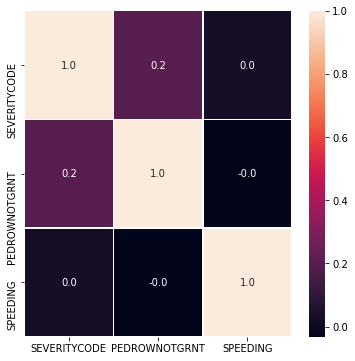

In [25]:
# Construct the Speeding/ROW Correlation Matrix
# sub-Feature Selection
df_featureSelection_Other = df_featureSelection[['SEVERITYCODE', 'PEDROWNOTGRNT', 'SPEEDING']]
# Create the Speeding/ROW
figureOther,axisOther = plt.subplots(figsize=(6, 6));
sns.heatmap(df_featureSelection_Other.corr(), annot=True, linewidths=.5, fmt= '.01f', ax = axisOther);

Finally, the speeding/ROW correlation matrix appears to show a slight correlation with not granting the right-of-way with a pedestrian. This correlation would again appear to make sense since a pedestrian would have decreased time to avoid an automobile.

In summary, we have explored our data and have shown the following:
<ul>
    <li>weather conditions have little impact on accident severity</li>
    <li>road conditions have little impact on accident severity</li>
    <li>lighting conditions have little impact on accident severity</li>
    <li>accident severity is greater in intersections</li>
    <li>accident severity increases with pedestrians and bicycles present</li>
    <li>driver impairment has little impact on accident severity</li>
    <li>speeding has little impact on accident severity</li>
</ul>

In the next section, we will construct our machine learning model.

## Machine Learning Model

In this section, we will be constructing training and test sets based upon our Feature Selection subset used previously. Then we will employ some different machine learning algorithms and use summary statistics to determine the most accurate model for predicting the severity of a traffic accident.

In [26]:
# Import Machine Learning Libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Import Machine Learning Metrics
from sklearn.metrics import jaccard_similarity_score, f1_score, precision_score, recall_score

Let's begin by normalizing our Feature Selection subset.

In [27]:
# Normalize Feature Selection subset using the Standard Scaler and Fit
machineLearningSet = df_featureSelection.drop(['SEVERITYCODE'],axis=1)
machineLearningSet = preprocessing.StandardScaler().fit(machineLearningSet).transform(machineLearningSet)

# Display the Normalized Set, setting the Machine Learning Set to 'X' to incorporate into the 'TrainX, TestY' methodology
X = machineLearningSet;
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  app.launch_new_instance()


array([[-0.35889501, -0.19692676, -0.1789089 ,  0.05122241, -0.4498286 ,
        -0.23631977, -0.16491254, -0.23750203, -0.0592965 , -1.31749437,
         1.3275049 , -0.01575499, -1.33434125, -0.05694245,  2.30495792,
        -0.00543539, -0.48763911, -0.01215463, -0.0250339 , -0.06981794,
        -1.58320784, -0.07983929, -0.01883181, -0.01944964, -0.07015894,
        -0.02443598,  1.63343772, -0.09139445, -0.0811775 , -0.61630225,
        -0.00687535, -0.12003648,  0.71374772, -0.18515723],
       [-0.35889501, -0.19692676, -0.1789089 ,  0.05122241, -0.4498286 ,
        -0.23631977, -0.16491254, -0.23750203, -0.0592965 ,  0.75901653,
        -0.75329289, -0.01575499, -1.33434125, -0.05694245, -0.4338474 ,
        -0.00543539,  2.05069688, -0.01215463, -0.0250339 , -0.06981794,
        -1.58320784, -0.07983929, -0.01883181, -0.01944964, -0.07015894,
        -0.02443598,  1.63343772, -0.09139445, -0.0811775 ,  1.62258047,
        -0.00687535, -0.12003648, -1.40105526, -0.18515723],
  

In [28]:
# Create the Target Value Variable
machineLearningTarget = df_featureSelection['SEVERITYCODE'].values

# Dsplay the Target Value Set
y = machineLearningTarget;
y[0:5]

array([2, 1, 1, 1, 2])

Now let's split this dataset into training and test sets.

In [29]:
# Create Training and Test Sets
X_train , X_test , y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=10)

# Display the Training Set
print ('Train set:', X_train.shape,  y_train.shape)

# Display the Test Set
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (135397, 34) (135397,)
Test set: (33850, 34) (33850,)


Given that we only have two values of potential severity (1 or 2), we are essentially making a binary classification model. In this course sequence, we learned about four such binary classification models:

<ul>
    <li>K-Nearest Neighbor</li>
    <li>Decision Trees</li>
    <li>Logistic Regression</li>
    <li>Support Vector Machine</li>
</ul>

After some examination, the K-Nearest Neighbor and Support Vector Machine caused the IBM Watson Studio to crash, most likely due to the computation time and limited memory. In the interests of completing the project, we will limit our investigation to two classification models: Decision Trees and Logistic Regression.


#### Decision Trees

In [30]:
# Import Decision Tree Local Libraries
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score

print('Decision Tree Libraries Loaded!')

Decision Tree Libraries Loaded!


In [31]:
# Create Jaccard and F1 Score Objects
depthRange = range(1, 9)
jaccardSimilarityScore = []
f1Score = []

# For Varying Depths, calculate jaccard similarity and f1 scores
for n in depthRange:
    dTree = DecisionTreeClassifier(criterion = 'gini', max_depth = n)
    dTree.fit(X_train, y_train)
    dTree_yhat = dTree.predict(X_test)
    jaccardSimilarityScore.append(jaccard_similarity_score(y_test, dTree_yhat))
    f1Score.append(f1_score(y_test, dTree_yhat, average = 'weighted'))

In [32]:
# Present the resulting data in a DataFrame
dTree_result = pd.DataFrame([jaccardSimilarityScore, f1Score], 
                             index = ['Jaccard Sim', 'F1'], columns = ['d = 1','d = 2','d = 3','d = 4','d = 5','d = 6','d = 7', 'd = 8'])
dTree_result.columns.name = 'Depths'
dTree_result

Depths,d = 1,d = 2,d = 3,d = 4,d = 5,d = 6,d = 7,d = 8
Jaccard Sim,0.706470,0.729897,0.729897,0.729867,0.731669,0.732555,0.734003,0.735923
F1,0.616746,0.664202,0.664202,0.664151,0.675101,0.688503,0.684014,0.690943


In [33]:
# With a Maximum Depth of 8, create the final Decision Tree Model
dTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth = 8)
dTreeModel.fit(X_train, y_train)
dTreeModel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Logistic Regression

In [34]:
# Import the needed local libraries
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

print('Logistic Regression Libraries Loaded!')

# Since the plots will involve Matplotlib features, we need to import that library as well
import matplotlib.pyplot as plt
%matplotlib inline

Logistic Regression Libraries Loaded!


In [35]:
# Create Solver and Accuracy Score Objects
solverList = ['lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag']
regularizationValueSet = [0.1, 0.01, 0.001]
index = []
lrAccuracy = []
iterations = 0

for p, q in enumerate(regularizationValueSet):
    for r, s in enumerate(solverList):
        index.append(p + r *5)
        iterations +=1
        lrModel = LogisticRegression(C = q, solver = s)
        lrModel.fit(X_train, y_train)
        lr_yhat = lrModel.predict(X_test)
        y_prob = lrModel.predict_proba(X_test)
        print('Test {}: With C = {} for solver = {}, LR Accuracy is : {}'.format(iterations, q, s, log_loss(y_test, y_prob) ))
        lrAccuracy.append(log_loss(y_test, y_prob))
        
    print('\n')

Test 1: With C = 0.1 for solver = lbfgs, LR Accuracy is : 0.5557660528012474
Test 2: With C = 0.1 for solver = saga, LR Accuracy is : 0.5557660993140813
Test 3: With C = 0.1 for solver = liblinear, LR Accuracy is : 0.5557664324634823
Test 4: With C = 0.1 for solver = newton-cg, LR Accuracy is : 0.5557659873630711
Test 5: With C = 0.1 for solver = sag, LR Accuracy is : 0.5557662441013761


Test 6: With C = 0.01 for solver = lbfgs, LR Accuracy is : 0.5557784963316049
Test 7: With C = 0.01 for solver = saga, LR Accuracy is : 0.5557785840871858
Test 8: With C = 0.01 for solver = liblinear, LR Accuracy is : 0.5557831061701002
Test 9: With C = 0.01 for solver = newton-cg, LR Accuracy is : 0.5557784099363405
Test 10: With C = 0.01 for solver = sag, LR Accuracy is : 0.5557784818207017


Test 11: With C = 0.001 for solver = lbfgs, LR Accuracy is : 0.5561091101536626
Test 12: With C = 0.001 for solver = saga, LR Accuracy is : 0.5561102316493183
Test 13: With C = 0.001 for solver = liblinear, LR 

Text(0, 0.5, 'LR Accuracy')

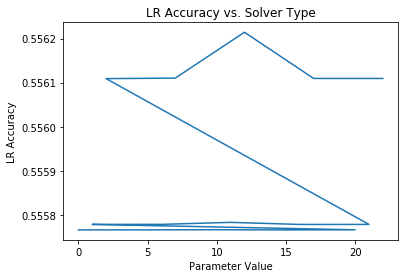

In [36]:
# Plot the Logistic Regression Accuracy Scores for different solver types
lrProbability = lrModel.predict_proba(X_test)
log_loss(y_test, lrProbability)
plt.plot(index, lrAccuracy)
plt.title('LR Accuracy vs. Solver Type')
plt.xlabel('Parameter Value')
plt.ylabel('LR Accuracy')

In [37]:
# With 'liblinear' giving the highest accuracy score, we create the final LR model
lrModel = LogisticRegression(C = 0.001, solver = 'liblinear')
lrModel.fit(X_train, y_train)
lrModel

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

Now that we have run our machine learning models, let's calculate the final scores to see which model - Decision Trees or Logistic Regression - performed better.

In [38]:
# Import Model Evaluation Libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [39]:
# Decision Tree Model Scores
f1_dTree = f1_score(y_test, dTree_yhat, average='weighted')
jss_dTree = jaccard_similarity_score(y_test, dTree_yhat)
ps_dTree = precision_score(y_test, dTree_yhat)
rs_dTree = recall_score(y_test, dTree_yhat)

#Logistic Regression Model Scores
f1_lr = f1_score(y_test, lr_yhat, average='weighted')
jss_lr = jaccard_similarity_score(y_test, lr_yhat)
ps_lr = precision_score(y_test, lr_yhat)
rs_lr = recall_score(y_test, lr_yhat)

# Present Results
ModelResults = {'Classification Model': ['Decision Trees', 'Logistic Regression'], 'f1 Score': [f1_dTree, f1_lr], 
              'Jaccard': [jss_dTree, jss_lr], 'Precision Score': [ps_dTree, ps_lr], 'Recall Score': [rs_dTree, rs_lr]};
df_ModelResults = pd.DataFrame(ModelResults);
df_ModelResults

,Classification Model,f1 Score,Jaccard,Precision Score,Recall Score
0,Decision Trees,0.690943,0.735923,0.731966,0.959823
1,Logistic Regression,0.678794,0.732201,0.724842,0.971696


# Results

As one can see from the preceding analysis, we were able to achieve a 73.6% match between the training set and the test set using the Decision Tree algorithm (and a 73.2% match with the Logistic Regression algorithm. In other words, from the accident location, number of persons involved, presence of pedestrians and/or bicyclists, number of vehicles involved, attentiveness/impairment of the driver, speeding, relative time of day and weather/road conditions, we could pick out the severity of the accident in roughly 3 out of 4 incidents.

Furthermore, we were able to show that, by themselves, weather conditions, road conditions, lighting conditions, driver impairment and speeding have little correlation with the severity of accident. However, accident severity is increased in situations involving traffic intersections and the presence of pedestrians and/or bicyclists.

# Discussion

The goal of this project was to be able to predict the severity of an accident based upon a number of factors. At the beginning, we were hoping to answer the following questions:

<ul>
    <li>Are there correlations betwwen poor weather conditions and severity? </li>
    <li>Does the presence of pedestrians make an accident better or worse? </li>
    <li> How do road conditions affect accident severity?</li>
</ul>

In each of these cases, we were able, within the constraints of time and hardware (namely IBM Watson Studio's memory) to answer these questions with some accuracy. According to our analysis, there is little correlation between poor weather conditions and accideny severity. Similarly, there is little correlation between poor road conditions and accident severity. However, the presence of pedestrians and bicyclists increases the likelihood of a severe traffic accident.

The lessons that can be learned from this project are twofold. One is to be very mindful of driving in intersections, as the likelihood of a severe accident is increased. And second is that when encountering pedestrians or bicyclists, extra caution should be taken.

# Conclusion

In order to better understand the potential impacts (and possibly mitigate them), it is important to understand the attributes that contribute to severe accidents. In the case of Seattle, Washington, we were able to show some of the factors that contribute to accident severity. There is no doubt that the information gathered here will be useful to drivers, pedestrians, city planners, emergency responders and insurance companies going forward.

On a final note, if one was to expand upon this work in a future exercise, evaluating the accuracy with other classification tools (i.e. K-Nearest Neighbor, Support Vector Machine) would be invaluable. Moreover, perhaps evaluating the make and model of the vehicles involved would also provide insight into traffic safety.

Thank you for reading this report!